In [1]:
import string
from nltk.corpus import stopwords

In [2]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [3]:
test_sentence = 'This is my first test string. Wow! we are doing fine'

In [4]:
no_punctuation = [char for char in test_sentence if char not in string.punctuation]
no_punctuation

['T',
 'h',
 'i',
 's',
 ' ',
 'i',
 's',
 ' ',
 'm',
 'y',
 ' ',
 'f',
 'i',
 'r',
 's',
 't',
 ' ',
 't',
 'e',
 's',
 't',
 ' ',
 's',
 't',
 'r',
 'i',
 'n',
 'g',
 ' ',
 'W',
 'o',
 'w',
 ' ',
 'w',
 'e',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'd',
 'o',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'i',
 'n',
 'e']

In [5]:
no_punctuation = ''.join(no_punctuation)
no_punctuation

'This is my first test string Wow we are doing fine'

In [8]:
no_punctuation = no_punctuation.lower()

In [9]:
no_punctuation.split()

['this',
 'is',
 'my',
 'first',
 'test',
 'string',
 'wow',
 'we',
 'are',
 'doing',
 'fine']

In [10]:
templist = ['This is my first test string Wow we are doing fine','This is my first test string Wow we are doing fine','This is my first test string Wow we are doing fine']

In [11]:
len(templist)

3

In [15]:
newlist = []
for i in templist:
    newlist.extend(i.split())

In [16]:
len(newlist)


33

In [17]:
newlist.count('This')

3

In [18]:
mycount = {}
for i in newlist:
    mycount[i] = newlist.count(i)
    

In [19]:
mycount

{'This': 3,
 'is': 3,
 'my': 3,
 'first': 3,
 'test': 3,
 'string': 3,
 'Wow': 3,
 'we': 3,
 'are': 3,
 'doing': 3,
 'fine': 3}

In [20]:
clean_sentence = [word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]


In [21]:
clean_sentence

['first', 'test', 'string', 'wow', 'fine']

In [22]:
no_punctuation

'this is my first test string wow we are doing fine'

In [23]:
from sklearn.datasets import load_digits
digit_dataset = load_digits()
#digit_dataset.DESCR
type(digit_dataset)

sklearn.utils.Bunch

In [24]:
digit_dataset.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [25]:
digit_dataset.target

array([0, 1, 2, ..., 8, 9, 8])

In [26]:
#Process documents using bag of words

#this class helps tokenizing the documents,it converts text into vector by assigning
#numeric values to each word
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
#create an object vectorizer by instantiating the class
vectorizer = CountVectorizer()

In [29]:
#create random documents
document1 = "Hi How are you"
document2 = "today is a very very very pleasant day and we can have some fun fun fun"
document3 = 'This was an amazing experience'

In [30]:
#putting them togther as a list
listofdocuments = [document1,document2,document3]

In [31]:
listofdocuments

['Hi How are you',
 'today is a very very very pleasant day and we can have some fun fun fun',
 'This was an amazing experience']

In [32]:
#Creating a bag of words for list of documents
#we can use fit method and fit the documents to the vectorized object
bag_of_words = vectorizer.fit(listofdocuments)

In [33]:
bag_of_words

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [34]:
#apply transform method and tranform the list fo documents
bag_of_words = vectorizer.transform(listofdocuments)

In [35]:
bag_of_words

<3x20 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [36]:
print(bag_of_words)

  (0, 3)	1
  (0, 9)	1
  (0, 10)	1
  (0, 19)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 7)	3
  (1, 8)	1
  (1, 11)	1
  (1, 12)	1
  (1, 13)	1
  (1, 15)	1
  (1, 16)	3
  (1, 18)	1
  (2, 0)	1
  (2, 1)	1
  (2, 6)	1
  (2, 14)	1
  (2, 17)	1


In [37]:
print(vectorizer.vocabulary_.get('very'))

16


In [38]:
print(vectorizer.vocabulary_.get('fun'))

7


In [39]:
type(bag_of_words)

scipy.sparse.csr.csr_matrix

In [40]:
#Applying Pipeline and Grid Search
import pandas as pd
import string
from pprint import pprint 
from time import time

In [41]:
#import the dataset
df_spam_collection = pd.read_csv('SpamCollection',sep='\t',names = ['response','message'])


In [42]:
df_spam_collection

,response,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [43]:
#import text processing libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [45]:
#import SGD classfier (to classify message in dataset)
from sklearn.linear_model import SGDClassifier

In [46]:
#import for gridsearch
from sklearn.model_selection import GridSearchCV

In [47]:
#import for pipeline

from sklearn.pipeline import Pipeline

In [48]:
#define the pipeline
#create pipeline by instantiating the pipeline class and passing vectorized, transformed and model classifier as arguments
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',SGDClassifier())
])

In [49]:
#paramters for gridsearch (tfidf paramters will be used to weigh the terms present in msg)
parameters = {'tfidf__use_idf':(True,False)}

In [50]:
#perform the gridsearch with pipeline and parameters
grid_search = GridSearchCV(pipeline,parameters,n_jobs=-1,verbose=1)
print('performing grid search now..')
print('paramters: ')
pprint(parameters)

performing grid search now..
paramters: 
{'tfidf__use_idf': (True, False)}


In [51]:
t0 = time()
grid_search.fit(df_spam_collection['message'],df_spam_collection['response'])
print('done in %0.3fs'%(time()-t0))
print()

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


done in 1.438s



[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished


In [52]:
df_spam_collection

,response,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [53]:
#plotting

In [54]:
#import numpy for generating random numbers
import numpy as np

#import matplotlib library
import matplotlib.pyplot as plt

#use style class to set the grid style
from matplotlib import style

#(if using notebook)
%matplotlib inline

In [55]:
#generate random numbers
randomNumber = np.random.rand(10)

In [56]:
randomNumber

array([0.77000438, 0.59394483, 0.72081466, 0.24757244, 0.65620395,
       0.77868457, 0.66446129, 0.81498603, 0.25829826, 0.21343956])

In [57]:
style.use('ggplot')

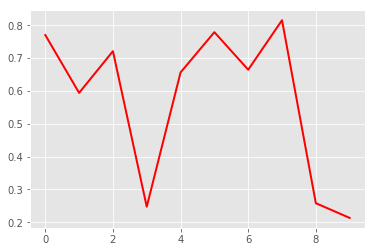

In [58]:
plt.plot(randomNumber, 'r',label='line one',linewidth=2)

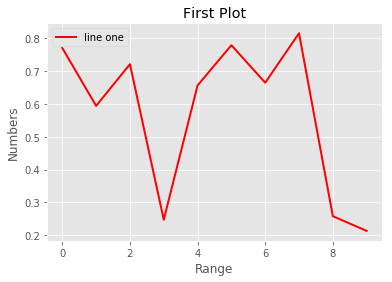

In [63]:
#x axis is number of random numbers (index)
plt.xlabel('Range')
#y axis is actual random number
plt.ylabel('Numbers')
#Title of plot
plt.title('First Plot')
plt.plot(randomNumber, 'r',label='line one',linewidth=2)
plt.legend()
plt.show()

In [64]:
web_customers = [123,645,950,1290,1630,1450,1034,1295,465,205,80]

In [65]:
time_hrs = [7,8,9,10,11,12,13,14,15,16,17]

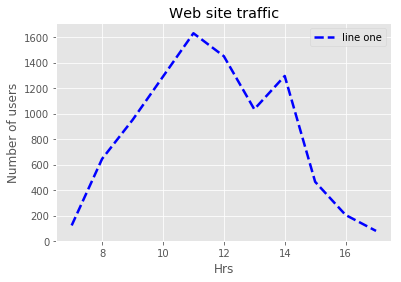

In [67]:
plt.plot(time_hrs,web_customers,color= 'b',label='line one',linestyle = '--',linewidth=2.5)
#set the title of the plot
plt.title('Web site traffic')
#setting label for x and y-axis
plt.xlabel('Hrs')
plt.ylabel('Number of users')
plt.legend()
plt.show()

In [68]:
pi = np.pi
x = np.linspace(-4*pi, 4*pi, 1000)

In [69]:
type(x)

numpy.ndarray

In [70]:
x[0:4]

array([-12.56637061, -12.54121272, -12.51605482, -12.49089692])

In [71]:
x.shape

(1000,)

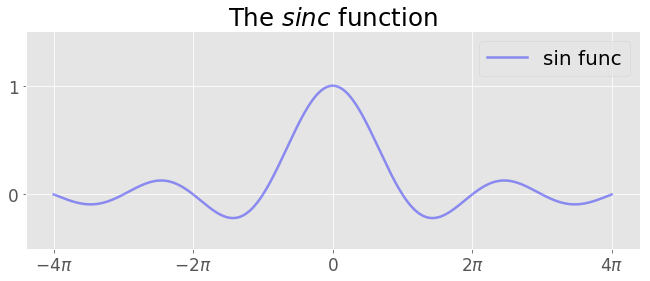

In [87]:
plt.rcParams['figure.figsize'] = (11,4)
plt.xticks([-4*pi,-2*pi,0,2*pi,4*pi],
['$-4\pi$','$-2\pi$','$0$','$2\pi$','$4\pi$'])
plt.rcParams.update({'font.size':17})
plt.yticks([0,1],['$0$','$1$'])
plt.ylim(-0.5,1.5)
plt.title('The $sinc$ function')
plt.plot(x, np.sin(x)/x,color= 'b',label='sin func',linewidth=2.5,alpha=.4)
plt.legend(loc = 'best',fontsize = 20)
#plt.show()

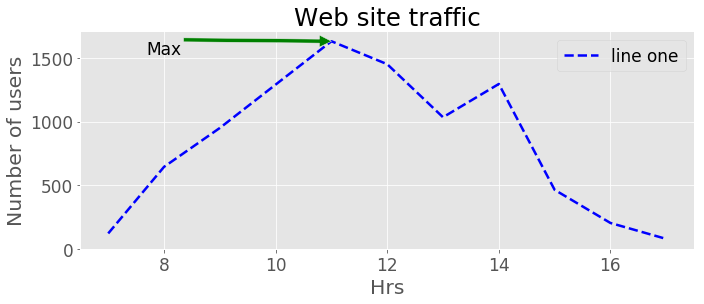

In [89]:
plt.plot(time_hrs,web_customers,color= 'b',label='line one',linestyle = '--',linewidth=2.5)
plt.annotate('Max',ha='center',va='bottom',xytext=(8,1500),xy=(11,1630),arrowprops={'facecolor':'green'})
#set the title of the plot
plt.title('Web site traffic')
#setting label for x and y-axis
plt.xlabel('Hrs')
plt.ylabel('Number of users')
plt.legend()
plt.show()

In [90]:
#Monday web traffic
web_monday = [123,645,950,1290,1630,1450,1034,1295,465,205,80]

#Tuesday web traffic
web_tuesday = [95,680,889,1145,1670,1323,1119,1265,510,310,110]

#wednesday web traffic
web_wednesday = [105,630,700,1006,1520,1124,1239,1380,580,610,230]

In [91]:
#Time distribution(hourly)
time_hrs = [7,8,9,10,11,12,13,14,15,16,17]

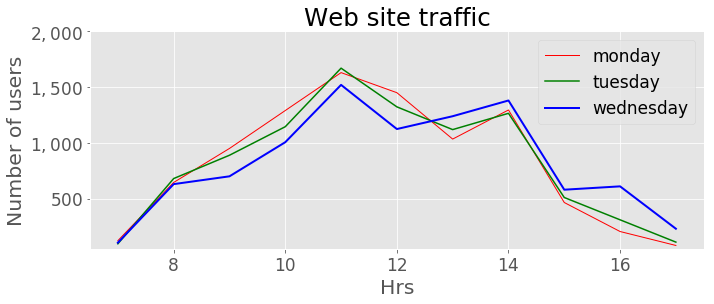

In [95]:
plt.plot(time_hrs,web_monday,'r',label='monday',linewidth=1)
plt.plot(time_hrs,web_tuesday,'g',label='tuesday',linewidth=1.5)
plt.plot(time_hrs,web_wednesday,'b',label='wednesday',linewidth=2)
plt.axis([6.5,17.5,50,2000])
plt.title('Web site traffic')
plt.xlabel('Hrs')
plt.ylabel('Number of users')
plt.yticks([500,1000,1500,2000],['$500$','$1,000$','$1,500$','$2,000$'])
plt.legend()

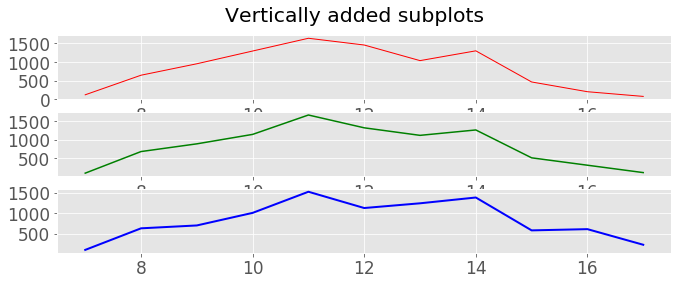

In [96]:
fig, axs = plt.subplots(3)
fig.suptitle('Vertically added subplots')
axs[0].plot(time_hrs,web_monday,'r',label='monday',linewidth=1)
axs[1].plot(time_hrs,web_tuesday,'g',label='tuesday',linewidth=1.5)
axs[2].plot(time_hrs,web_wednesday,'b',label='wednesday',linewidth=2)
plt.show()

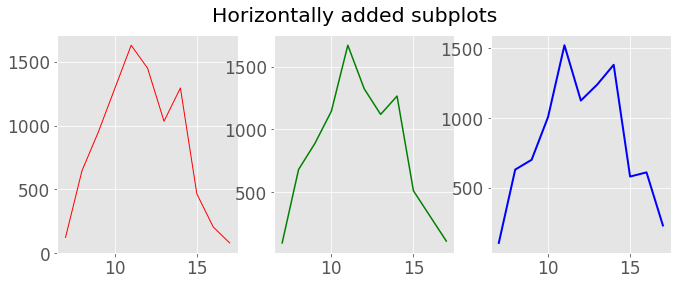

In [97]:
fig, axs = plt.subplots(1,3)
fig.suptitle('Horizontally added subplots')
axs[0].plot(time_hrs,web_monday,'r',label='monday',linewidth=1)
axs[1].plot(time_hrs,web_tuesday,'g',label='tuesday',linewidth=1.5)
axs[2].plot(time_hrs,web_wednesday,'b',label='wednesday',linewidth=2)
plt.show()

In [98]:
from dateutil.parser import parse 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [103]:
ap = pd.read_csv('https://raw.githubusercontent.com/ajaykuma/Datasets/master/AirPassengers.csv',parse_dates=['date'])
ap.head(n=5)


,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [104]:
ap.dtypes

date     datetime64[ns]
value             int64
dtype: object

In [105]:
x = ap['date'].values
y1 = ap['value'].values

In [106]:
x[0:2]

array(['1949-01-01T00:00:00.000000000', '1949-02-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [107]:
y1[0:2]

array([112, 118])

In [111]:
def plot_ap(ap, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.fill_between(x, y1=y1,y2=-y1 ,alpha=0.5, linewidth=2, color='seagreen')
    plt.ylim(-800, 800)
    plt.title('Air Passengers (Two Side View)', fontsize=16)
    plt.show()

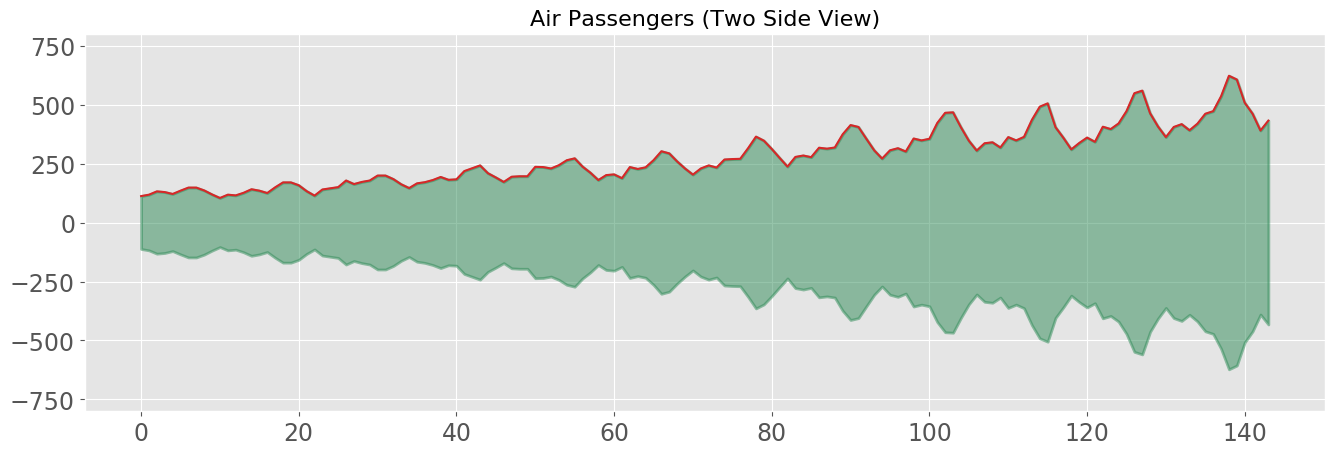

In [112]:
plot_ap(ap,x=ap.index,y=ap.value)

In [113]:
ser = pd.read_csv('https://raw.githubusercontent.com/ajaykuma/Datasets/master/a10.csv', parse_dates=['date'], index_col='date')
ser.reset_index(inplace=True)

In [114]:
ser

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


In [115]:
ser['year'] = [d.year for d in ser.date]

In [116]:
ser

,date,value,year
0,1991-07-01,3.526591,1991
1,1991-08-01,3.180891,1991
2,1991-09-01,3.252221,1991
3,1991-10-01,3.611003,1991
4,1991-11-01,3.565869,1991
...,...,...,...
199,2008-02-01,21.654285,2008
200,2008-03-01,18.264945,2008
201,2008-04-01,23.107677,2008
202,2008-05-01,22.912510,2008


In [121]:
ser['month'] = [d.strftime('%b') for d in ser.date]

In [122]:
ser

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov
...,...,...,...,...
199,2008-02-01,21.654285,2008,Feb
200,2008-03-01,18.264945,2008,Mar
201,2008-04-01,23.107677,2008,Apr
202,2008-05-01,22.912510,2008,May


In [123]:
years = ser['year'].unique()

In [124]:
years

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008])

In [125]:
import matplotlib as mpl

In [126]:
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

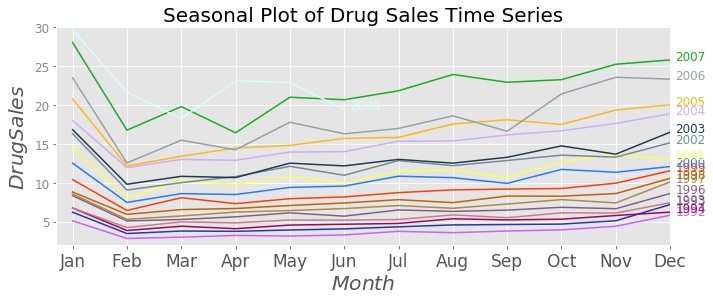

In [129]:
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=ser.loc[ser.year==y, :], color=mycolors[i], label=y)
        plt.text(ser.loc[ser.year==y, :].shape[0]-.9, ser.loc[ser.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])